Making plots using Qian's data.

step8_best_E


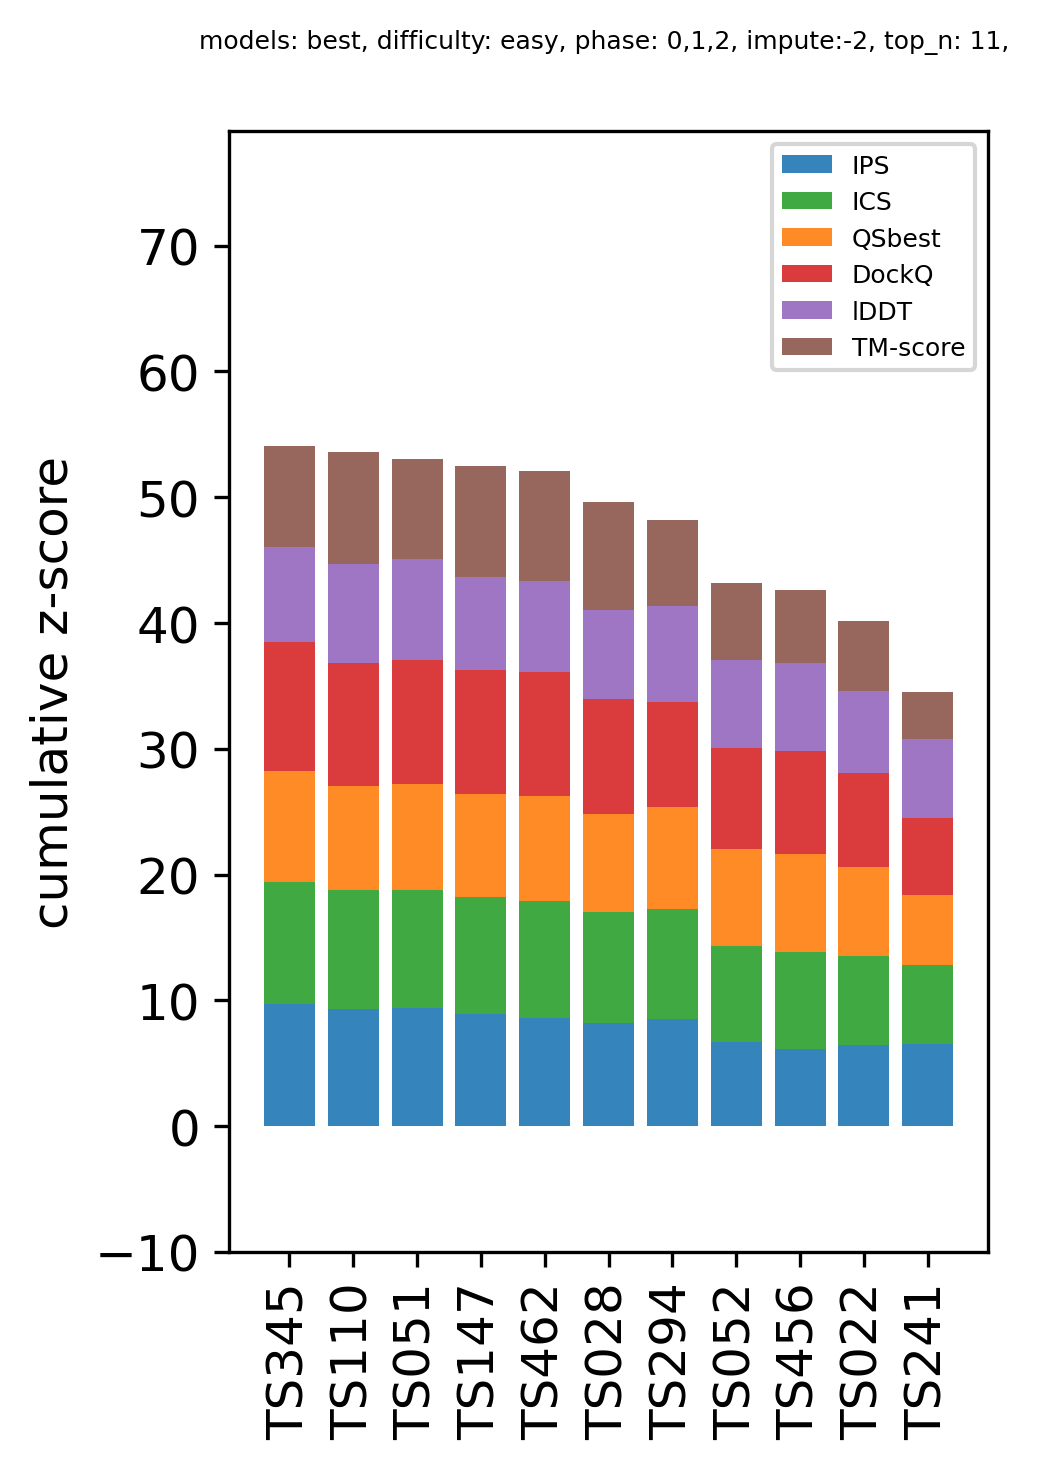

In [66]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations, permutations
import random
import os
import pandas as pd
from fractions import Fraction

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)


model = "first"
model = "best"

mode = "easy"
# mode = "medium"
# mode = "difficult"
# mode = "all"

phase = "0"
phase = "1"
phase = "2"
phase = "0,1,2"

top_n = 11

impute_value = -2
os.chdir("/home2/s439906/project/CASP16/oligomer/")
path = "/data/data1/conglab/qcong/CASP16/stage2_oligomer_ranks/"

file_name = None
if model == "best":
    if phase == "0,1,2":
        file_name = "step8_best"
    if phase == "0":
        file_name = "step8_best_T0"
    if phase == "1":
        file_name = "step8_best_T1"
    if phase == "2":
        file_name = "step8_best_T2"
if model == "best":
    if mode == "easy":
        file_name = "step8_best_E"
    if mode == "medium":
        file_name = "step8_best_M"
    if mode == "difficult":
        file_name = "step8_best_H"

if model == "first":
    if phase == "0,1,2":
        file_name = "step8_first"
    if phase == "0":
        file_name = "step8_first_T0"
    if phase == "1":
        file_name = "step8_first_T1"
    if phase == "2":
        file_name = "step8_first_T2"
if model == "first":
    if mode == "easy":
        file_name = "step8_first_E"
    if mode == "medium":
        file_name = "step8_first_M"
    if mode == "difficult":
        file_name = "step8_first_H"
print(file_name)
fig_dir = "./CASP16_figures_olig/"
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

df = pd.read_csv(path + file_name, sep="\t", header=None, names=["groups","targets#", "sum", "IPS", "ICS", "QSbest", "DockQ", "lDDT", "TM-score"])
df.set_index("groups", inplace=True)
largest_sum = df["sum"].max()
measures = ["IPS", "ICS", "QSbest", "DockQ", "lDDT", "TM-score"]
score_df = df[measures]
df
score_df = score_df.head(top_n)
groups = score_df.index.to_list()
IPS = score_df["IPS"].to_list()
ICS = score_df["ICS"].to_list()
QSbest = score_df["QSbest"].to_list()
DockQ = score_df["DockQ"].to_list()
lDDT = score_df["lDDT"].to_list()
TM_score = score_df["TM-score"].to_list()

all_scores = [IPS, ICS, QSbest, DockQ, lDDT, TM_score]
positive_series = [[val if val > 0 else 0 for val in series] for series in all_scores]
negative_series = [[val if val < 0 else 0 for val in series] for series in all_scores]

if top_n > 12:
    fig = plt.figure(figsize=(7, 6), dpi=300)


    bottom_positive = np.zeros(len(groups))
    bottom_negative = np.zeros(len(groups))

    colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive']

    for i, series in enumerate(positive_series):
        plt.bar(groups, series, bottom=bottom_positive, color=colors[i], alpha=0.9)
        bottom_positive += series

    for i, series in enumerate(negative_series):
        plt.bar(groups, series, bottom=bottom_negative, color=colors[i], alpha=0.5)
        bottom_negative += series

    plt.title(f'models: {model}, difficulty: {mode}, phase: {phase}, impute:{impute_value}, top_n: {top_n}, ', fontsize=12, pad=20)
    plt.legend(measures, loc='upper right',fontsize=10)
    plt.xticks(rotation=90, fontsize=16)
    # y range : -5 to 95
    # if model == "best":
    #     plt.ylim(-5, 105)
    # elif model == "first":
    #     plt.ylim(-10, 75)
    plt.ylim(-10,largest_sum+25)
    plt.ylabel('cumulative z-score', fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    plt.show()
    fig.savefig(fig_dir+f"sum_z_score_{model}_{mode}_{phase}_impute={impute_value}_top_n={top_n}.png")

else:
    fig = plt.figure(figsize=(3.5, 5), dpi=300)
    bottom_positive = np.zeros(len(groups))
    bottom_negative = np.zeros(len(groups))

    colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive']

    for i, series in enumerate(positive_series):
        plt.bar(groups, series, bottom=bottom_positive, color=colors[i], alpha=0.9)
        bottom_positive += series

    for i, series in enumerate(negative_series):
        plt.bar(groups, series, bottom=bottom_negative, color=colors[i], alpha=0.5)
        bottom_negative += series

    plt.title(f'models: {model}, difficulty: {mode}, phase: {phase}, impute:{impute_value}, top_n: {top_n}, ', fontsize=6, pad=20)
    plt.legend(measures, loc='upper right',fontsize=6)
    plt.xticks(rotation=90, fontsize=12)
    # y range : -5 to 95
    # if model == "best":
    #     plt.ylim(-5, 105)
    # elif model == "first":
    #     plt.ylim(-10, 75)
    plt.ylim(-10,largest_sum+25)
    plt.ylabel('cumulative z-score', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()
    fig.savefig(fig_dir+f"sum_z_score_{model}_{mode}_{phase}_impute={impute_value}_top_n={top_n}.png")


step9_best_E.mtx


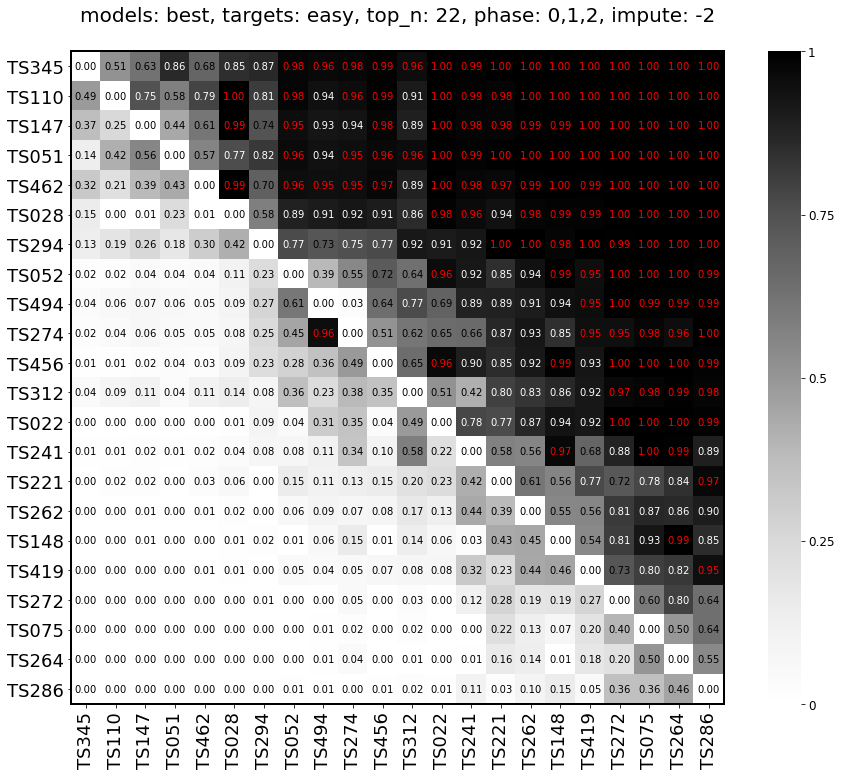

In [ ]:
matrix_name = None
if model == "best":
    if phase == "0,1,2":
        matrix_name = "step9_best.mtx"
    if phase == "0":
        matrix_name = "step9_best_T0.mtx"
    if phase == "1":
        matrix_name = "step9_best_T1.mtx"
    if phase == "2":
        matrix_name = "step9_best_T2.mtx"
if model == "best":
    if mode == "easy":
        matrix_name = "step9_best_E.mtx"
    if mode == "medium":
        matrix_name = "step9_best_M.mtx"
    if mode == "difficult":
        matrix_name = "step9_best_H.mtx"

if model == "first":
    if phase == "0,1,2":
        matrix_name = "step9_first.mtx"
    if phase == "0":
        matrix_name = "step9_first_T0.mtx"
    if phase == "1":
        matrix_name = "step9_first_T1.mtx"
    if phase == "2":
        matrix_name = "step9_first_T2.mtx"
if model == "first":
    if mode == "easy":
        matrix_name = "step9_first_E.mtx"
    if mode == "medium":
        matrix_name = "step9_first_M.mtx"
    if mode == "difficult":
        matrix_name = "step9_first_H.mtx"
print(matrix_name)
top_n = 22
mtx = pd.read_csv(path + matrix_name, sep="\t", index_col=0)
# impute diag na with 0
mtx = mtx.apply(pd.to_numeric, errors='coerce')
mtx = mtx.fillna(0)
bootstrap_rank = mtx.index.to_list()
# print(mtx.shape)
# to np.array
bootstrap_array = mtx.to_numpy()
bootstrap_array





plt.figure(figsize=(16, 12))
ax = sns.heatmap(bootstrap_array, annot=True, fmt=".2f",
                 cmap='Greys', cbar=True, square=True,
                 xticklabels= bootstrap_rank, yticklabels=bootstrap_rank,
                 #   linewidths=1, linecolor='black',
                 )

for text in ax.texts:
    value = float(text.get_text())
    if value >= 0.95:
        text.set_color('red')
    elif value < 0.95 and value >= 0.75:
        text.set_color('white')
    else:
        text.set_color('black')

cbar = ax.collections[0].colorbar
cbar.set_ticks([0, float(1/4), float(1/2),
                float(3/4), 1])
cbar.set_ticklabels([0, float(1/4), float(1/2),
                    float(3/4), 1])
cbar.ax.tick_params(labelsize=12)

for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(2)
# ax.set_xticklabels(ax.get_xticklabels())
# ax.set_yticklabels(ax.get_yticklabels())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=18)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=18)
# plt.xticks(np.arange(top_n), bootstrap_rank,rotation=90, fontsize=18)
# plt.yticks(np.arange(top_n), bootstrap_rank, rotation=0, fontsize=18)
plt.title(f"models: {model}, targets: {mode}, top_n: {top_n}, phase: {phase}, impute: {impute_value}", fontsize=20, pad=30)
# if equal_weight:
#     plt.title("bootstrap result of {} score for {} models, {} targets, top {} groups, equal weight".format(
#         measure_type, model, mode, top_n), fontsize=16, pad=20)
# else:
#     plt.title("bootstrap result of {} score for {} models, {} targets, top {} groups".format(
#         measure_type, model, mode, top_n), fontsize=16, pad=20)
fig_path = "./CASP16_figures_olig/"
png_top_file = f"bootstrap_{model}_{mode}_{phase}_impute={impute_value}_top_{top_n}.png"
plt.savefig(fig_path + png_top_file, dpi=300)
plt.show()